### Hiearchical Clustering

#### Single Linkage -- Nearest neighbor(DataPoints)

Problem Statement: Do Hiearchical Clustering  for the following Dataset using Single Linkage

Dataset-->Universities.csv

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#import the required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset
Univ = pd.read_csv("C:/Users/Akaash/Downloads/Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


Inference: 

Normalization of Value is required Because value are not on same Scale,as Euclidean Distance is influenced by different scale value

Also Dropping Univ Column as Object/string dtype is not required

#### Normalization function

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # Giving 0,1 through MinMaxScaler as Normalization values are 0,1

#Fitting the Normalize Value and Droping the 'Univ' column as it is categorial
rescaledX = scaler.fit_transform(Univ.iloc[:,1:])

In [4]:
#Converting into a Dataframe as Normalization Function gives an array of values
scaled_value = pd.DataFrame(rescaledX)

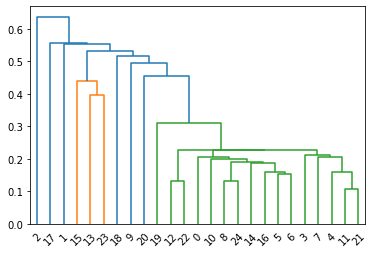

In [5]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_value, method='single'))

In [6]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

Inference: Creating No of Clusters = 4 , using Euclidean Distance, Linkage method = Single

In [7]:
# save clusters for chart
y_hc = hc.fit_predict(scaled_value)

#Creating a Dataframe of Clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,0
1,3
2,1
3,0
4,0


In [8]:
#Appending the original Dataset with Clusters
Final = pd.concat([Univ,Clusters], axis = 1)
Final

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [9]:
#Extracting Data Based on Particular Cluster
list(np.where(Final.Clusters==0))

[array([ 0,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19,
        20, 21, 22, 23, 24], dtype=int64)]

##### Inference: Gives the List of Data Belonging to 0 Cluster

#### Standardization Function

In [10]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fillting the Standardize Value and Droping the 'Univ' column as it is categorial
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

Inference: Now values are scaled if you want you can convert it into DataFrame as did above in the normalization function as these function return values in the aaray format, you can work with the array also.

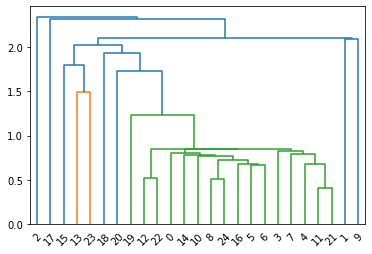

In [11]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_Univ_df, method='single'))

In [12]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

Inference: Creating No of Clusters = 4 , using Euclidean Distance, Linkage method = Single

In [13]:
# save clusters for chart
y_hc = hc.fit_predict(scaled_Univ_df)

#Creating a Dataframe of Clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,1
1,0
2,3
3,1
4,1


In [14]:
#Appending the original Dataset with Clusters
Final = pd.concat([Univ,Clusters], axis = 1)
Final

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [15]:
#Extracting Data Based on Particular Cluster
list(np.where(Final.Clusters==1))

[array([ 0,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20,
        21, 22, 23, 24], dtype=int64)]

##### Inference: Gives the List of Data Belonging to 1 Cluster

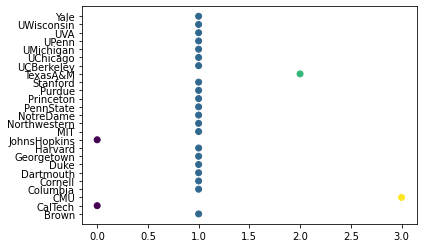

In [16]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(Final['Clusters'],Final['Univ'], c = hc.labels_)

#### Complete Linkage-- (Farthest Neighbor)

Problem Statement: Do Hiearchical Clustering to the for the following Dataset using Complete Linkage


In [17]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/Universities.csv")
Dataset.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


Inference: 

Normalization of Value is required Because value are not on same Scale,as Euclidean Distance is influenced by different scale value

Also Dropping Univ Column as Object/string dtype is not required

#### Normalization function

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # Giving 0,1 through MinMaxScaler as Normalization values are 0,1

#Fitting the Normalize Value and Droping the 'Univ' column as it is categorial
rescaledX = scaler.fit_transform(Univ.iloc[:,1:])

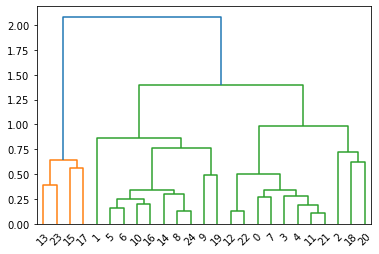

In [19]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_value, method='complete'))

In [20]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

Inference: Creating No of Clusters = 5 , using Euclidean Distance, Linkage method = complete

In [21]:
# save clusters for chart
y_hc = hc.fit_predict(rescaledX)

#Creating a Dataframe of Clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,3
1,4
2,2
3,3
4,3


In [22]:
#Appending the original Dataset with Clusters
Final = pd.concat([Univ,Clusters], axis = 1)
Final

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [23]:
#Extracting Data Based on Particular Cluster
list(np.where(Final.Clusters==3))

[array([ 0,  3,  4,  7, 11, 12, 21, 22], dtype=int64)]

##### Inference: Gives the List of Data Belonging to 3 Cluster

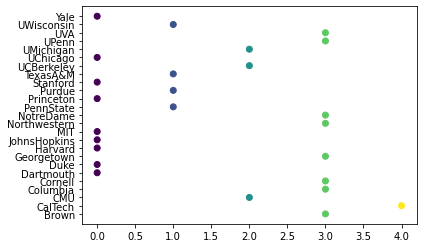

In [24]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(Final['Clusters'],Final['Univ'], c = hc.labels_)